In [1]:
import helpers as h
import schwarz_preconditioners as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 9
A, b = h.assemble_fem_problem(n)

In [3]:
partition = np.zeros((9, (100)))

for i in range(10):
    for j in range(10):
        
        # Omega 1
        if (i<=4 and j<=4):
            partition[0, i + 10*j] = 1
        
        # Omega 2
        if (i>=2 and i<=7 and j<=4):
            partition[1, i + 10*j] = 1
        
        # Omega 3
        if (i>=5 and j<=4):
            partition[2, i + 10*j] = 1
        
        # Omega 4
        if (i<=4 and j>=2 and j<=7):
            partition[3, i + 10*j] = 1
        
        # Omega 5
        if (i>=2 and i<=7 and j>=2 and j<=7):
            partition[4, i + 10*j] = 1
            
        # Omega 6
        if (i>=5 and j>=2 and j<=7):
            partition[5, i + 10*j] = 1
            
        # Omega 7
        if (i<=4 and j>=5):
            partition[6, i + 10*j] = 1
            
        # Omega 8
        if (i>=2 and i<=7 and j>=5):
            partition[7, i + 10*j] = 1
        
        # Omega 9
        if (i>=5 and j>=5):
            partition[8, i + 10*j] = 1

partition = partition.T

num_subdomains = partition.shape[1]

Omega_ovlp = [partition[:, i].nonzero()[0] for i in range(num_subdomains)]
Omega_i_ovlp = Omega_ovlp[0]
Ai = A[Omega_i_ovlp[:, None], Omega_i_ovlp]

CG iteration 1, residual = 1.2430264721561664
CG iteration 2, residual = 0.2959234292220508
CG iteration 3, residual = 0.14033460033245676
CG iteration 4, residual = 0.052114569038215396
CG iteration 5, residual = 0.008543904272939901
CG iteration 6, residual = 0.0003221150587159629
CG iteration 7, residual = 9.982219605585397e-05
CG iteration 8, residual = 2.391953023992386e-16


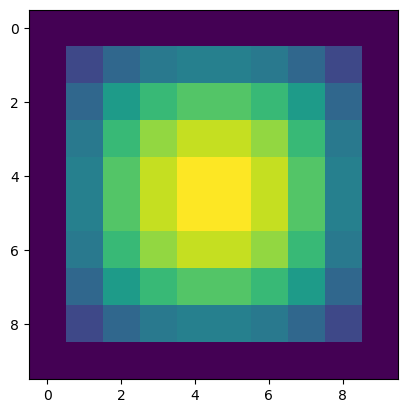

In [11]:
one_level = sp.OneLevelOASPreconditioner(A, partition)
x0 = np.zeros_like(b)

u_approx = h.cg(A, b, tol=1e-6, maxiter=200, x0=x0, pre=one_level.apply)
res = u_approx.reshape(10,10)
plt.imshow(res)
plt.show()